## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


print(mouse_metadata)
print(study_results)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [2]:
# Combine the data into a single dataset
merge_table_df =pd.merge(mouse_metadata,study_results, on = "Mouse ID", how= "inner")
# Display the data table for preview
merge_table_df.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
Mice_count= merge_table_df["Mouse ID"].count()
Mice_count

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_table_df[merge_table_df.duplicated(["Mouse ID", "Timepoint"])]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID = merge_table_df[merge_table_df.duplicated(["Mouse ID"])]
duplicate_mice_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_table_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
Mice_count= clean_df["Mouse ID"].count()
Mice_count

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = merge_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = merge_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = merge_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = merge_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = merge_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


single_summ_df = pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, "Standard Deviation":standard_deviation, "SEM": SEM })


single_summ_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df=single_summ_df.describe()
df


# Using the aggregation method, produce the same summary statistics in a single line
df= df.aggregate({"Mean":[min, max],
              "Median":[min, max],
              "Variance":[min, max],
              "Standard Deviation":[min, max],
              "SEM":[min, max],})
df
    


,Mean,Median,Variance,Standard Deviation,SEM
min,5.621333,4.712429,10.000000,1.218709,0.102544
max,55.235638,53.698743,68.553577,10.000000,10.000000


## Bar and Pie Charts

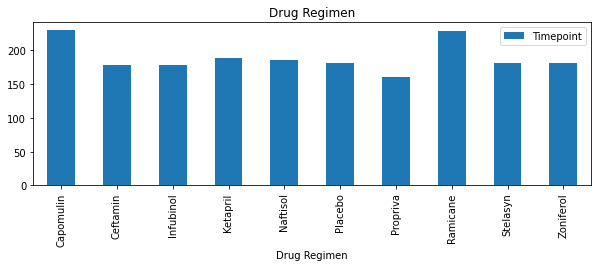

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regi_data = pd.DataFrame(merge_table_df.groupby(["Drug Regimen"]).count()).reset_index()

drug_df = drug_regi_data[["Drug Regimen", "Timepoint"]]
drug_df = drug_df.set_index("Drug Regimen")


drug_df.plot(kind = "bar", figsize = (10,3))

plt.title("Drug Regimen")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Count')

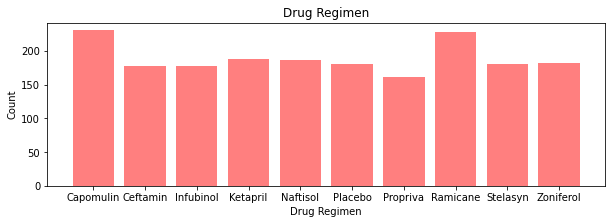

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
d_list = single_summ_df.index.tolist()
d_count = (merge_table_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
#x_axis = np.arrange(len(d_count))

x_axis = d_list
plt.figure(figsize = (10,3))
plt.bar(x_axis,d_count, color = 'r', alpha = 0.5, align = "center")
plt.title("Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")



Text(0, 0.5, '')

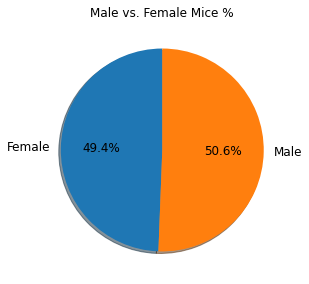

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Don't forget to make definitions "DONT FORGET"

male_v_female = pd.DataFrame(merge_table_df.groupby(["Sex"]).count()).reset_index()



plt.figure(figsize = (10,5))
sub_p = plt.subplot(121,aspect = "equal")
male_v_female.plot(kind = "pie", y= "Mouse ID", ax=sub_p, autopct= '%1.1f%%',
                   startangle= 90, shadow = True, labels = male_v_female["Sex"], legend = False, fontsize= 12)
plt.title("Male vs. Female Mice %")
plt.xlabel("")
plt.ylabel("")

(-1.2531313611333712,
 1.1085731035347695,
 -1.110892202687011,
 1.2540444617811506)

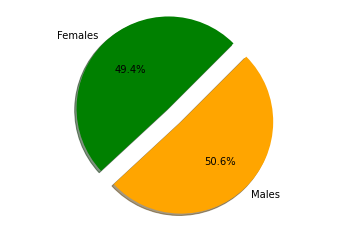

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#add the labels and details to chart

gen_count = (merge_table_df.groupby(["Sex"])["Age_months"].count()).tolist()


labels= ["Females", "Males"]
colors= ["Green", "Orange"]
explode= (0.2, 0)

plt.pie(gen_count, explode = explode, labels= labels, colors = colors, autopct='%1.1f%%', shadow= True, startangle= 45)
plt.axis("equal")






In [22]:
#reference
merge_table_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Regimens= merge_table_df[merge_table_df["Drug Regimen"].isin([ "Capomulin", "Ramicane", "Infubinol","Ceftamin"])]
Regimens=Regimens.sort_values(["Timepoint"], ascending=True)
Regimens



# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint






,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1391,q132,Infubinol,Female,1,30,0,45.000000,0
195,i738,Capomulin,Female,23,20,0,45.000000,0
205,a520,Ramicane,Male,13,21,0,45.000000,0
1370,p438,Ceftamin,Female,11,26,0,45.000000,0
...,...,...,...,...,...,...,...,...
350,v923,Capomulin,Female,19,21,45,40.658124,2
144,m957,Capomulin,Female,3,19,45,33.329098,1
337,j119,Capomulin,Female,7,23,45,38.125164,1
59,s508,Ramicane,Male,1,17,45,30.276232,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
